## Mallet-TM : 
### Extract Topic Model with LdaMallet from KCC News and CIS test data

In [1]:
# -*- coding: utf-8 -*-
"""
Input: "KCC Data/CkipNewsCis18850-KccDict2020.txt"
Output: "KCC Data/NewsCisTest-KccDict2020-MalletNum20.txt"

@author: johnson
"""
from gensim import corpora, models, utils
from gensim.models import LdaModel
from gensim.models import CoherenceModel

### read data from txt file, and tokenize words, clean-up text

In [2]:
fList = []
with open("KCC Data/CkipNewsCis18850-KccDict2020.txt","r", encoding='utf-8-sig') as files: #這邊應該要填入個別議員的
     for file in files:
        #simple_preprocess: tokenize,去除標點 - gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)
        fList.append(list(utils.simple_preprocess(file, deacc=True, min_len=2,)))
print("fList[:1] = ", fList[:1])
print("------------------------------")

fList[:1] =  [['馬英九', '昨天', '上午', '視察', '衛武營藝術文化中心', '文化部', '洪孟啟', '工程', '副主委', '顏久榮', '高雄市', '副市長', '吳宏謀', '一同', '到場', '聽取', '衛武營', '興建', '工程', '簡報', '瞭解', '工程進度', '執行', '情形', '完成', '百分之九十五', '工程進度', '共計', '投入', '新臺幣', '一百零五億八千萬', '經費', '預計', '六月', '竣工', '明年', '開館', '營運', '目標', '馬英九', '指出', '衛武營', '案子', '九十四年', '編列', '預算', '核定', '施工', '正式', '完工', '時間', '長達', '十三', '原先', '預計', '故宮', '南院', '工程', '單位', '部門', '克服', '困難', '值得', '檢討', '總統', '致詞', '民國', '九十九年', '主持', '動土', '典禮', '原從', '黃土', '生長出', '有如', '魟魚', '悠遊', '海浪', '建築', '實在', '驚豔', '過程', '包含', '團隊', '付出', '努力', '籌建', '過程', '艱辛', '各界', '關注', '投入', '新建', '工程', '幾近', '完工', '特別', '肯定', '文化部', '籌建', '過程', '付出', '辛勞', '高雄市政府', '各界', '支持', '配合', '總統', '文化', '城市', '期許', '衛武營藝術文化中心', '臺灣', '藝術', '力量', '南方', '集結地', '臺北', '國家兩廳院', '臺中', '國家歌劇院', '攜手', '並進', '打造', '台灣', '國際', '藝文', '版圖', '地標', '文化部', '洪孟啟', '衛武營', '考驗', '面臨', '營運', '壓力', '文化部', '衛武營', '南部', '高雄市文化中心', '嘉義', '文化', '園區', '故宮', '南院', '台南', '地方', '藝文', '團體', '高雄大東文化藝術中心', '屏東', '演藝廳'

### creat dictionary for corpus

In [3]:
# creat a unique id for each word segment
dict = corpora.Dictionary(list(fList))
print("dict = ", dict)
print("------------------------------")

dict =  Dictionary(113533 unique tokens: ['一同', '一百零五億八千萬', '上午', '並進', '主持']...)
------------------------------


### creat corpus need for Topic Modeling

In [4]:
# creat mapping matrix of [word_id, word_frequency] for each word segment
corpus = [dict.doc2bow(text) for text in fList]   
print("corpus[:1] = ", corpus[:1])  
print("================================================")

print("print lists of [word:frequency]")
[[print((dict[id], freq)) for id,freq in cp] for cp in corpus[:1]]
print("======================================================")

corpus[:1] =  [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 3), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 3), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1), (51, 4), (52, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 4), (70, 5), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (105, 1), (106, 2), (107, 1), (108, 1), (109

### building the Topic Model from MALLET
#### enviroment setting for Mallet LDA: https://programminghistorian.org/en/lessons/topic-modeling-and-mallet#installing-mallet

In [11]:
import os
import gensim
os.environ.update({'MALLET_HOME':r'C:/mallet-2.0.8'})
mallet_path = "C://mallet-2.0.8/bin/mallet"
ldamal = models.wrappers.LdaMallet(mallet_path, corpus=corpus, id2word=dict, num_topics=20)
output = open("KCC Data/NewsCisTest-KccDict2020-MalletNum20.txt", 'w', encoding='utf-8-sig')

#print(ldamal.show_topics(formatted=False))
# 列出最重要的前若干个主题
lsTM = ldamal.show_topics(num_topics=20, num_words=20, log=False, formatted=False)
for tupleTM in lsTM:
        str1 = "".join(str(x) for x in tupleTM)
        #print("type(str1) = ", type(str1))
        str1 += "\n"
        print("strTM = ", str1)
        output.write(str1)
output.close()
 
#  print("------------------------------")
#  print("Perplexity = ", ldamal.log_perplexity(corpus))

print("------------------------------")
cm = models.CoherenceModel(model=ldamal, texts=list(fList), dictionary= dict, coherence= 'c_v')
coher_lda = cm.get_coherence()
print("\n Coherence Score: ", coher_lda)


strTM =  0[('交通', 0.026066530272031523), ('交通局', 0.01670202823874113), ('捷運', 0.016683084539415523), ('高雄輕軌', 0.01483291657194817), ('民眾', 0.012395493925387083), ('規劃', 0.011479881791316208), ('公車', 0.010797908615594454), ('機車', 0.009516051627895228), ('目前', 0.008088959612033039), ('運輸', 0.00774797302417216), ('停車', 0.0074322447020787556), ('路線', 0.007356469904776338), ('車站', 0.007021797883357329), ('鐵路地下化', 0.006560834533100957), ('停車場', 0.0062009042459144756), ('國道', 0.006188275113030739), ('高雄市政府捷運工程局', 0.005942007021797883), ('改善', 0.005923063322472279), ('車輛', 0.005512616503750852), ('公里', 0.005462099972215907)]

strTM =  1[('發生', 0.021297529283042554), ('民眾', 0.016106733615490962), ('高雄市政府警察局', 0.011670808559723836), ('警方', 0.009889653183603192), ('現場', 0.008659807804853224), ('人員', 0.008583472574448053), ('警察', 0.008464728882706678), ('發現', 0.00825268657602565), ('電話', 0.007540224425577391), ('事件', 0.006785353813792928), ('員警', 0.0056996972035860596), ('消防', 0.00541131966649986)


 Coherence Score:  0.5917530104303329


### Finding the optimal number of topics

In [12]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    # global mallet_path, dict
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dict)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        coher = coherencemodel.get_coherence()
        print("Num_topics: ", num_topics, " Coherence Score= ", coher)
    return model_list, coherence_values

In [13]:
lim=24; sta=3; ste=3;
model_list, coherence_values = compute_coherence_values(dictionary=dict, corpus=corpus, texts=list(fList), limit=lim, start=sta, step=ste)

Num_topics:  3  Coherence Score=  0.4188801691731768
Num_topics:  6  Coherence Score=  0.5291556130368963
Num_topics:  9  Coherence Score=  0.5242757024501361
Num_topics:  12  Coherence Score=  0.5447145150632723
Num_topics:  15  Coherence Score=  0.5704048782017779
Num_topics:  18  Coherence Score=  0.5921882831500732
Num_topics:  21  Coherence Score=  0.59217078107706


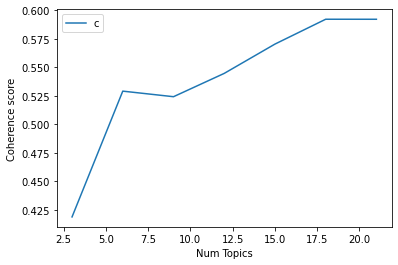

In [14]:
# Show graph
import matplotlib.pyplot as plt

limit=lim; start=sta; step=ste;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [9]:
# Print the coherence scores
optNum = 0
maxCV = 0
for m, cv in zip(x, coherence_values):
    # maxCV = lambda cv, maxCV: cv if cv > maxCV else maxCV
    if cv > maxCV:
        optNum = m
        maxCV = cv 
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
print("Optimal Topic Num =", optNum, " Highest Value =", maxCV)

Num Topics = 3  has Coherence Value of 0.35
Num Topics = 6  has Coherence Value of 0.5182
Num Topics = 9  has Coherence Value of 0.5837
Num Topics = 12  has Coherence Value of 0.686
Num Topics = 15  has Coherence Value of 0.6874
Num Topics = 18  has Coherence Value of 0.698
Num Topics = 21  has Coherence Value of 0.6828
Num Topics = 24  has Coherence Value of 0.6935
Num Topics = 27  has Coherence Value of 0.7065
Num Topics = 30  has Coherence Value of 0.6367
Num Topics = 33  has Coherence Value of 0.6103
Optimal Topic Num = 27  Highest Value = 0.7064854552953387


###  Select the model and print the topics

In [15]:
from pprint import pprint

optimal_model = model_list[5]
# model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=25))

[(0,
  '0.021*"高雄市政府環境保護局" + 0.018*"中國石油" + 0.017*"污染" + 0.013*"登革熱" + 0.012*"管線" + '
  '0.011*"林園" + 0.011*"居民" + 0.010*"公司" + 0.010*"環境" + 0.008*"工廠" + 0.008*"石化" '
  '+ 0.008*"高雄市" + 0.007*"疫情" + 0.007*"工業區" + 0.007*"垃圾" + 0.007*"遷村" + '
  '0.006*"環保" + 0.006*"大林蒲" + 0.005*"業者" + 0.005*"管理" + 0.005*"防疫" + '
  '0.005*"目前" + 0.004*"環境影響評估" + 0.004*"小港" + 0.004*"環境保護署"'),
 (1,
  '0.022*"工程" + 0.022*"道路" + 0.013*"水利局" + 0.012*"經費" + 0.011*"原住民" + '
  '0.011*"地方" + 0.011*"工務局" + 0.010*"改善" + 0.009*"地區" + 0.009*"完成" + '
  '0.008*"排水" + 0.008*"單位" + 0.008*"區公所" + 0.007*"目前" + 0.007*"淹水" + '
  '0.006*"高雄市政府工務局養護工程處" + 0.006*"李長生" + 0.006*"會勘" + 0.006*"公尺" + 0.006*"施工" '
  '+ 0.006*"原民會" + 0.005*"滯洪池" + 0.005*"計畫" + 0.005*"里長" + 0.005*"旗山"'),
 (2,
  '0.033*"學校" + 0.023*"學生" + 0.023*"教育局" + 0.021*"教育" + 0.015*"運動" + '
  '0.013*"孩子" + 0.011*"老師" + 0.010*"家長" + 0.009*"高雄市" + 0.008*"大學" + '
  '0.007*"校長" + 0.007*"國中" + 0.006*"國小" + 0.006*"學習" + 0.006*"校園" + 0.006*"空間" '
  '+ 0.006*"中心" + 0.005*"

### Finding the dominant topic in each sentence

In [16]:
import pandas as pd

# Finding the dominant topic in each sentence
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamal, corpus=corpus, texts=list(fList))

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,19.0,0.2182,"活動, 舉辦, 高雄, 民眾, 參加, 昨天, 現場, 邀請, 參與, 藝術","[馬英九, 昨天, 上午, 視察, 衛武營藝術文化中心, 文化部, 洪孟啟, 工程, 副主委..."
1,1,14.0,0.1694,"台灣, 政府, 中央, 總統, 蔡英文, 國家, 政治, 行政院, 支持, 民主","[日本, 九州熊本, 接連, 強震, 襲擊, 台灣, 捐贈, 熊本, 縣政府, 日本, 政府..."
2,2,3.0,0.2436,"觀光, 高雄, 日本, 旗津, 觀光局, 台灣, 高雄市, 遊客, 旅遊, 文化","[壽山動物園, 增進, 動物飼養, 福祉, 保育, 工作, 設立, 高雄市壽山動物園動物認養..."
3,3,10.0,0.4206,"服務, 氣爆, 社會, 昨天, 協助, 社會局, 弱勢, 高雄氣爆, 生活, 家屬","[日本, 熊本地震, 災情, 慘重, 高雄市, 陳菊, 昨天, 率先, 捐出, 一月, 所得..."
4,4,18.0,0.3424,"高雄, 產業, 高雄市, 城市, 發展, 經濟, 機會, 投資, 推動, 包括","[睽違, 超過, 世紀, 緬甸, 官方, 代表, 包含, 緬甸, 聯邦, 議會, 議員, 美..."
5,5,18.0,0.3274,"高雄, 產業, 高雄市, 城市, 發展, 經濟, 機會, 投資, 推動, 包括","[高雄, 翻轉, 政府, 力挺, 高雄市, 陳菊, 日前, 高雄市議會, 施政報告, 指出,..."
6,6,18.0,0.5865,"高雄, 產業, 高雄市, 城市, 發展, 經濟, 機會, 投資, 推動, 包括","[高雄市, 陳菊, 前往, 東台, 精機, 參訪, 高雄, 鼓勵, 傳統, 產業, 升級, ..."
7,7,0.0,0.3280,"交通, 交通局, 捷運, 高雄輕軌, 民眾, 規劃, 公車, 機車, 目前, 運輸","[交通局, 委託, 民間, 公司, 民調, 昨天, 公布, 民調, 搭乘, 公車, 民眾, ..."
8,8,19.0,0.4583,"活動, 舉辦, 高雄, 民眾, 參加, 昨天, 現場, 邀請, 參與, 藝術","[臺灣塑膠工業股份有限公司, 企業, 回饋, 地方, 藝文, 活動, 週六, 晚間, 高雄市..."
9,9,5.0,0.2975,"民主進步黨, 立委, 中國國民黨, 選區, 支持, 參選, 選舉, 候選人, 競選, 議員","[中國國民黨, 分區, 立委, 陳宜民, 鳳山, 地區, 成立, 聯合, 服務處, 日前, ..."


### Find the most representative document for each topic

In [17]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()
print("------------------------------")
sent_topics_sorteddf_mallet[:10]

------------------------------


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.6426,"交通, 交通局, 捷運, 高雄輕軌, 民眾, 規劃, 公車, 機車, 目前, 運輸","[國道, 一號, 鼎金, 系統, 交流道, 鼎力路, 南下, 出口, 匝道, 六月, 十七日..."
1,1.0,0.6626,"發生, 民眾, 高雄市政府警察局, 警方, 現場, 人員, 警察, 發現, 電話, 事件","[記者, 黃建華, 黃佳琳, 王榮祥, 高雄, 現場, 直擊, 昨天, 清晨, 五點, 高雄..."
2,2.0,0.6970,"道路, 工程, 工務局, 地方, 水利局, 改善, 公園, 完成, 經費, 開闢","[水利局, 水利局, 流域, 綜合, 治理, 計畫, 大寮區, 提報, 治理, 工程, 豪大..."
3,3.0,0.7055,"觀光, 高雄, 日本, 旗津, 觀光局, 台灣, 高雄市, 遊客, 旅遊, 文化","[高雄市政府海洋局, 高雄港, 蚵仔寮, 興達港, 安平, 藍色公路, 近日, 推出, 高雄..."
4,4.0,0.5389,"相關, 申請, 單位, 管理, 人員, 公司, 資料, 機關, 業者, 業務","[保護, 資料, 隱私, 二月, 二日, 土地登記, 謄本, 分為, 地政局, 登記, 名義..."
5,5.0,0.7903,"民主進步黨, 立委, 中國國民黨, 選區, 支持, 參選, 選舉, 候選人, 競選, 議員","[高屏, 縣市, 立委, 選情, 綠油油, 民主進步黨, 可望, 高雄市, 席次, 五望六,..."
6,6.0,0.6176,"土地, 地方, 開發, 鳳山, 規劃, 公頃, 空間, 計畫, 興建, 目前","[大寮眷村, 岡山, 岡山大鵬九村, 高雄, 高雄市政府都市發展局, 發布, 鳳山, 工協,..."
7,7.0,0.6491,"高雄市政府環境保護局, 中國石油, 污染, 居民, 管線, 林園, 公司, 工業區, 工廠, 石化","[中國石油, 公司, 原本, 昨天, 後勁, 居民, 提出, 高雄, 煉油, 總廠, 遷移,..."
8,8.0,0.6002,"韓國瑜, 高雄, 高市, 指出, 質疑, 媒體, 中國國民黨, 民主進步黨, 回應, 昨天","[新竹, ｊ姓, 商界, 女強人, 籌備, 耶誕, 婚禮, 泡湯, 準新郎, 落跑, 輾轉,..."
9,9.0,0.6024,"市長, 陳菊, 高雄市, 議員, 市民, 議會, 市府, 團隊, 康裕成, 質詢","[曾俊傑, 議長, 高雄銀行, 總經理, 董事長, 高雄市政府海洋局, 長官, 康裕成, 議..."


###  Showing topic distribution across documents

In [18]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,19.0,"活動, 舉辦, 高雄, 民眾, 參加, 昨天, 現場, 邀請, 參與, 藝術",1271.0,0.0674
1.0,14.0,"台灣, 政府, 中央, 總統, 蔡英文, 國家, 政治, 行政院, 支持, 民主",861.0,0.0457
2.0,3.0,"觀光, 高雄, 日本, 旗津, 觀光局, 台灣, 高雄市, 遊客, 旅遊, 文化",1242.0,0.0659
3.0,10.0,"服務, 氣爆, 社會, 昨天, 協助, 社會局, 弱勢, 高雄氣爆, 生活, 家屬",880.0,0.0467
4.0,18.0,"高雄, 產業, 高雄市, 城市, 發展, 經濟, 機會, 投資, 推動, 包括",507.0,0.0269
...,...,...,...,...
18845.0,13.0,"局長, 議員, 市長, 地方, 裡面, 市政府, 真的, 本席, 答覆, 辦法",NaN,NaN
18846.0,17.0,"學校, 學生, 教育局, 教育, 孩子, 運動, 老師, 家長, 高雄市, 照顧",NaN,NaN
18847.0,2.0,"道路, 工程, 工務局, 地方, 水利局, 改善, 公園, 完成, 經費, 開闢",NaN,NaN
18848.0,6.0,"土地, 地方, 開發, 鳳山, 規劃, 公頃, 空間, 計畫, 興建, 目前",NaN,NaN
